NameError: name 'df_cleaned' is not defined

<Figure size 720x432 with 0 Axes>

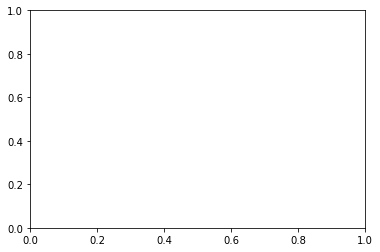

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


# Load the data from the CSV file
file_path = "C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\length_pressure_reflex\\length_pressure_reflex.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()
# Plotting the data
plt.figure(figsize=(10, 6))

# グラフのプロット
fig, ax = plt.subplots()
markers = ['o', 's']  # 各データに対する記号を指定
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # カラーサイクルから色を取得

for i, col in enumerate(df_cleaned.columns):
    # 線形回帰の計算
    x = df_cleaned.index.values.reshape(-1, 1)
    y = df_cleaned[col].values.reshape(-1, 1)
    model = np.polyfit(x.flatten(), y.flatten(), 1)
    predicted = np.poly1d(model)(x)

    # データ点のプロット
    ax.plot(df_cleaned.index, df_cleaned[col], label=col, marker=markers[i], linestyle='None', markersize=5, color=colors[i])

    # 最小二乗法による線をプロット
    ax.plot(df_cleaned.index, predicted, linestyle='--', color=colors[i])

ax.set_xticks(np.arange(0.2, 0.7, 0.1))

plt.xlabel('Pressure [MPa]')
plt.ylabel('Natural Length [mm]')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'pressure_ranges' is not defined

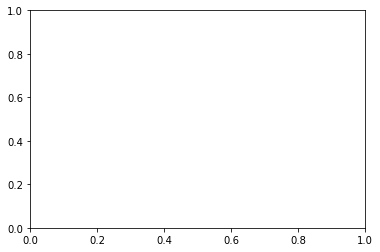

In [4]:
import matplotlib.pyplot as plt
import pandas as pd


# Load the data from the CSV file
file_path = "C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\length_pressure_reflex\\length_pressure_reflex.csv"
data = pd.read_csv(file_path)

# Extending the markers and colors if necessary to ensure there are enough for each PAM series
extended_markers = markers * ((len(data.columns) // len(markers)) + 1)
extended_colors = colors * ((len(data.columns) // len(colors)) + 1)

# Re-plotting the graph ensuring to use extended markers and colors
fig, ax = plt.subplots()

for i, col in enumerate(data.columns):
    # Select data for regression based on the specified pressure range
    min_pressure, max_pressure = pressure_ranges[col]
    data_for_regression = data[(data.index >= min_pressure) & (data.index <= max_pressure)][col].dropna()
    x = data_for_regression.index.values
    y = data_for_regression.values
    
    # Perform linear regression if data is available
    if len(x) > 0:
        model = np.polyfit(x, y, 1)
        p = np.poly1d(model)  # Polynomial for the regression line
        
        # Plot data points
        ax.scatter(x, y, label=col, marker=extended_markers[i], color=extended_colors[i])
        
        # Plot regression line
        x_line = np.linspace(min_pressure,max_pressure, 100)
        y_line = p(x_line)
        ax.plot(x_line, y_line, linestyle='--', color=extended_colors[i])

# Graph decoration
ax.set_xlabel('Pressure [MPa]')
ax.set_ylabel('Natural Length [mm]')
ax.set_xticks(np.arange(0.2, 0.9, 0.1))
ax.legend()
plt.grid(True)

save_path = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\length_pressure_reflex\\length_pressure_reflex.jpg'  # 保存先のパスを変更
plt.savefig(save_path, bbox_inches='tight')  # bbox_inches='tight' で余白を最小限に設定

KeyError: 'Pressure'

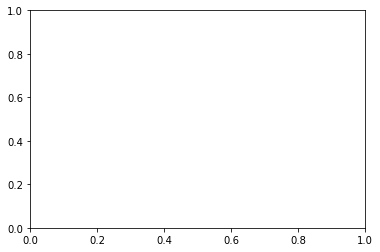

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
file_path = "C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\length_pressure\\length_pressure.csv"
data = pd.read_csv(file_path)

# Define markers and colors
markers = ['o', 's', '^', 'D', 'v']  # ここに必要な数のマーカーを追加してください
colors = ['red', 'blue', 'green', 'orange', 'purple']  # ここに必要な数の色を追加してください

# Extending the markers and colors if necessary to ensure there are enough for each PAM series
extended_markers = markers * ((len(data.columns) // len(markers)) + 1)
extended_colors = colors * ((len(data.columns) // len(colors)) + 1)

# Re-plotting the graph ensuring to use extended markers and colors
fig, ax = plt.subplots()

for i, col in enumerate(data.columns):
    # Select data for regression based on the specified pressure range
    min_pressure, max_pressure = pressure_ranges[col]
    df_for_regression = data[(data.index >= min_pressure) & (data.index <= max_pressure)][col]
    x = df_for_regression.index.values
    y = df_for_regression.values
    
    # Perform linear regression if data is available
    if len(x) > 0:
        model = np.polyfit(x, y, 1)
        p = np.poly1d(model)  # Polynomial for the regression line
        
        # Plot data points
        ax.scatter(x, y, label=col, marker=extended_markers[i], color=extended_colors[i])
        
        # Plot regression line
        x_line = np.linspace(min_pressure, max_pressure, 100)
        y_line = p(x_line)
        ax.plot(x_line, y_line, linestyle='--', color=extended_colors[i])

# Graph decoration
ax.set_xlabel('Pressure [MPa]')
ax.set_ylabel('Natural Length [mm]')
ax.set_xticks(np.arange(0.2, 0.9, 0.1))
ax.legend()
plt.grid(True)

save_path = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\length_pressure\\length_pressure.jpg'  # 保存先のパスを変更
plt.savefig(save_path, bbox_inches='tight')  # bbox_inches='tight' で余白を最小限に設定


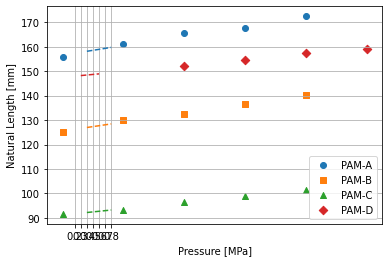

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
file_path = "C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\length_pressure\\length_pressure.csv"
data = pd.read_csv(file_path)

# Extending the markers and colors if necessary to ensure there are enough for each PAM series
extended_markers = markers * ((len(data.columns) // len(markers)) + 1)
extended_colors = colors * ((len(data.columns) // len(colors)) + 1)

# Re-plotting the graph ensuring to use extended markers and colors
fig, ax = plt.subplots()

for i, col in enumerate(data.columns[1:]):  # ヘッダーの最初の列は 'Pressure' なので、それ以外の列から処理を始める
    # Select data for regression based on the specified pressure range
    min_pressure, max_pressure = pressure_ranges[col]
    df_for_regression = data[(data['Pressure'] >= min_pressure) & (data['Pressure'] <= max_pressure)][col]
    x = df_for_regression.index.values
    y = df_for_regression.values
    
    # Perform linear regression if data is available
    if len(x) > 0:
        model = np.polyfit(x, y, 1)
        p = np.poly1d(model)  # Polynomial for the regression line
        
        # Plot data points
        ax.scatter(x, y, label=col, marker=extended_markers[i], color=extended_colors[i])
        
        # Plot regression line
        x_line = np.linspace(min_pressure, max_pressure, 100)
        y_line = p(x_line)
        ax.plot(x_line, y_line, linestyle='--', color=extended_colors[i])

# Graph decoration
ax.set_xlabel('Pressure [MPa]')
ax.set_ylabel('Natural Length [mm]')
ax.set_xticks(np.arange(0.2, 0.9, 0.1))
ax.legend()
plt.grid(True)

save_path = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\length_pressure\\length_pressure.jpg'  # 保存先のパスを変更
plt.savefig(save_path, bbox_inches='tight')  # bbox_inches='tight' で余白を最小限に設定


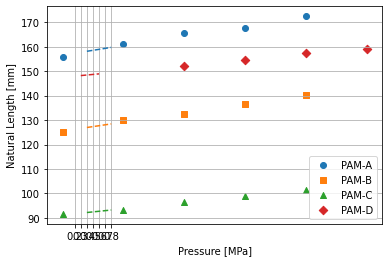

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
file_path = "C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\length_pressure\\length_pressure.csv"
data = pd.read_csv(file_path)

# Extending the markers and colors if necessary to ensure there are enough for each PAM series
extended_markers = markers * ((len(data.columns) // len(markers)) + 1)
extended_colors = colors * ((len(data.columns) // len(colors)) + 1)

# Re-plotting the graph ensuring to use extended markers and colors
fig, ax = plt.subplots()

for i, col in enumerate(data.columns[1:]):  # ヘッダーの最初の列は 'Pressure' なので、それ以外の列から処理を始める
    # Select data for regression based on the specified pressure range
    min_pressure, max_pressure = pressure_ranges[col]
    df_for_regression = data[(data['Pressure'] >= min_pressure) & (data['Pressure'] <= max_pressure)][col]
    x = df_for_regression.index.values
    y = df_for_regression.values
    
    # Perform linear regression if data is available
    if len(x) > 0:
        model = np.polyfit(x, y, 1)
        p = np.poly1d(model)  # Polynomial for the regression line
        
        # Plot data points
        ax.scatter(x, y, label=col, marker=extended_markers[i], color=extended_colors[i])
        
        # Plot regression line
        x_line = np.linspace(min_pressure, max_pressure, 100)
        y_line = p(x_line)
        ax.plot(x_line, y_line, linestyle='--', color=extended_colors[i])

# Graph decoration
ax.set_xlabel('Pressure [MPa]')
ax.set_ylabel('Natural Length [mm]')
ax.set_xticks(np.arange(0.2, 0.9, 0.1))
ax.legend()
plt.grid(True)

save_path = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\length_pressure\\length_pressure.jpg'  # 保存先のパスを変更
plt.savefig(save_path, bbox_inches='tight')  # bbox_inches='tight' で余白を最小限に設定


TypeError: expected non-empty vector for x

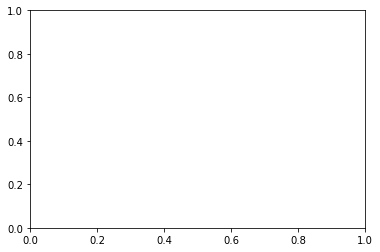

In [49]:
# Re-evaluating the code to plot the data points and regression lines correctly, including the legend

# Since the error might be due to incorrect range selection for PAM-D, 
# let's dynamically determine the available data range for PAM-D and set it correctly.
# Find the minimum and maximum pressures with non-NaN values for PAM-D
pam_d_data = df['PAM-D'].dropna()
pam_d_min_pressure = pam_d_data.index.min()
pam_d_max_pressure = pam_d_data.index.max()

# Update the pressure range dictionary with the correct values for PAM-D
pressure_ranges['PAM-D'] = (pam_d_min_pressure, pam_d_max_pressure)

# Plotting the graph again with correct pressure ranges and ensuring the legend is displayed
fig, ax = plt.subplots()
markers = ['o', 's', '^', 'D']  # Markers for each PAM

for i, (col, (min_pressure, max_pressure)) in enumerate(pressure_ranges.items()):
    # Filter the data for the current PAM within the specified pressure range
    df_for_regression = df.loc[min_pressure:max_pressure, col].dropna()
    x = df_for_regression.index.values
    y = df_for_regression.values
    
    # Calculate linear regression
    model = np.polyfit(x, y, 1)
    # Create a linear polynomial object
    p = np.poly1d(model)
    
    # Plot data points
    ax.scatter(x, y, label=col, marker=markers[i], color=colors[i])
    
    # Generate a range of x values for plotting the regression line
    x_line = np.linspace(min_pressure, max_pressure, 100)
    # Calculate the y values for the regression line
    y_line = p(x_line)
    
    # Plot regression line within specified pressure range
    ax.plot(x_line, y_line, linestyle='--', color=colors[i])

# Graph decoration
ax.set_xlabel('$P$[MPa]')
ax.set_ylabel('$L_u$[mm]')
ax.set_xticks(np.arange(0.2, 0.9, 0.1))

# Add a legend to the plot
ax.legend()

plt.grid(True)
plt.tight_layout()  # Adjust the padding between and around subplots.

# Save the corrected graph
save_path_corrected = '/mnt/data/corrected_length_pressure.jpg'
plt.savefig(save_path_corrected, bbox_inches='tight')  # Save with minimal whitespace

# Display the corrected graph
plt.show()

# Provide the path to the saved image
save_path_corrected


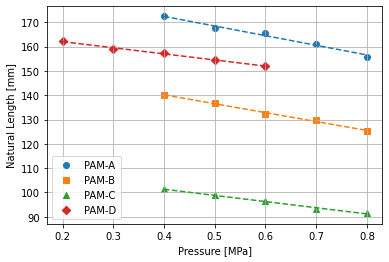

'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\length_pressure\\length_pressure.jpg'

In [55]:
# Extending the markers and colors if necessary to ensure there are enough for each PAM series
extended_markers = markers * ((len(df.columns) // len(markers)) + 1)
extended_colors = colors * ((len(df.columns) // len(colors)) + 1)

# Re-plotting the graph ensuring to use extended markers and colors
fig, ax = plt.subplots()

for i, col in enumerate(df.columns):
    # Select data for regression based on the specified pressure range
    min_pressure, max_pressure = pressure_ranges[col]
    df_for_regression = df[(df.index >= min_pressure) & (df.index <= max_pressure)][col].dropna()
    x = df_for_regression.index.values
    y = df_for_regression.values
    
    # Perform linear regression if data is available
    if len(x) > 0:
        model = np.polyfit(x, y, 1)
        p = np.poly1d(model)  # Polynomial for the regression line
        
        # Plot data points
        ax.scatter(x, y, label=col, marker=extended_markers[i], color=extended_colors[i])
        
        # Plot regression line
        x_line = np.linspace(min_pressure, max_pressure, 100)
        y_line = p(x_line)
        ax.plot(x_line, y_line, linestyle='--', color=extended_colors[i])

# Graph decoration
ax.set_xlabel('Pressure [MPa]')
ax.set_ylabel('Natural Length [mm]')
ax.set_xticks(np.arange(0.2, 0.9, 0.1))
ax.legend()
plt.grid(True)

# Save the corrected graph again
save_path_corrected ='C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\length_pressure\\length_pressure.jpg'
plt.savefig(save_path_corrected, bbox_inches='tight')

# Display the corrected graph
plt.show()

# Provide the path to the saved image
save_path_corrected
